# Industry Project Yelp; EDA

**Import and load data and libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv("./Yelp Restaurant Reviews.csv")

In [4]:
df

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...
...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB


Convert Date column into datetime

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df["Year_Month"] = df["Date"].dt.to_period('M')

In [8]:
df["Year"] = df["Date"].dt.year

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Yelp URL     19896 non-null  object        
 1   Rating       19896 non-null  int64         
 2   Date         19896 non-null  datetime64[ns]
 3   Review Text  19896 non-null  object        
 4   Year_Month   19896 non-null  period[M]     
 5   Year         19896 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2), period[M](1)
memory usage: 932.8+ KB


<AxesSubplot: xlabel='Rating'>

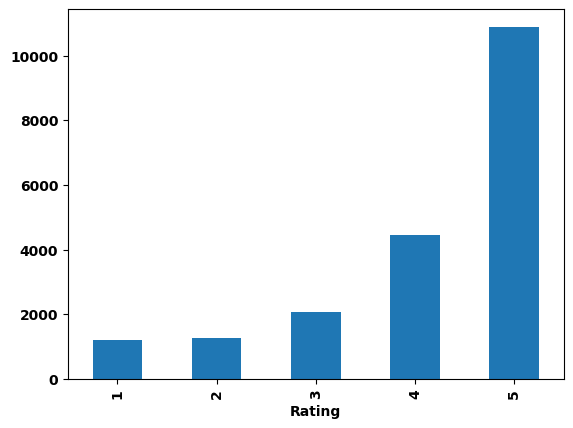

In [9]:
df.groupby("Rating")["Rating"].count().plot(kind="bar")

Text(0, 0.5, 'Count')

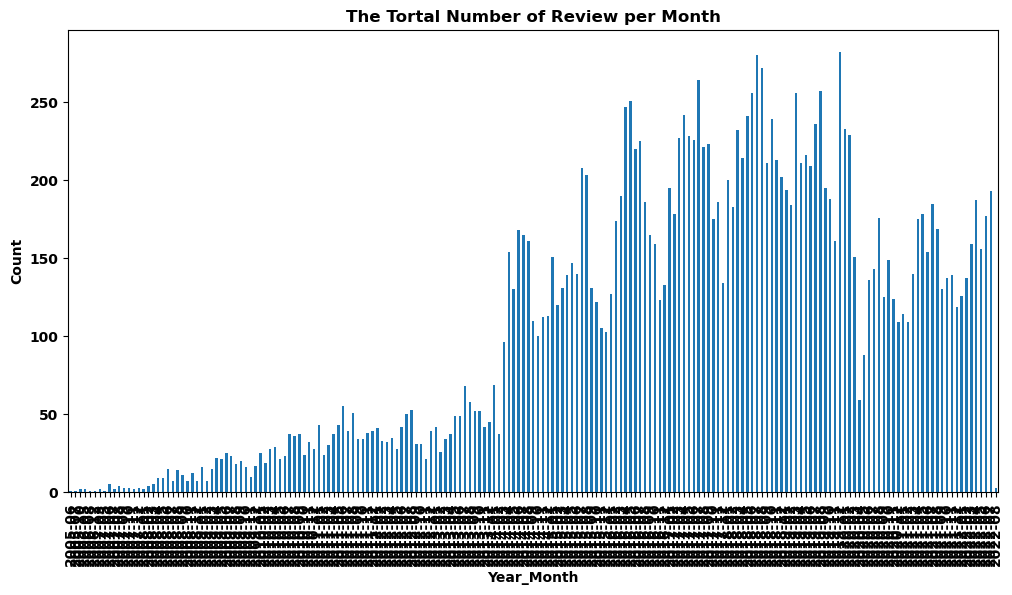

In [45]:
plt.figure(figsize=(12,6))

df.groupby('Year_Month')["Year_Month"].count().plot(kind='bar')
plt.title("The Tortal Number of Review per Month")
plt.ylabel("Count")

Text(0, 0.5, 'Total Reviews')

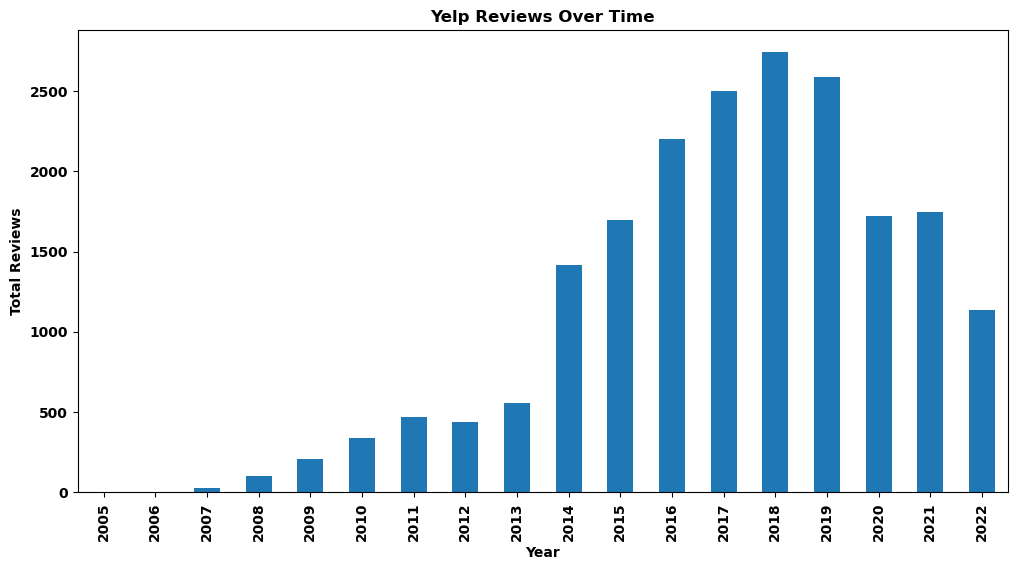

In [11]:
plt.figure(figsize=(12,6))

df.groupby('Year')["Year"].count().plot(kind='bar')
plt.title("Yelp Reviews Over Time")
plt.ylabel("Total Reviews")

In [12]:
df.groupby('Year')["Year"].count()

Year
2005       4
2006       4
2007      25
2008     102
2009     210
2010     339
2011     467
2012     436
2013     554
2014    1415
2015    1700
2016    2200
2017    2499
2018    2743
2019    2589
2020    1722
2021    1749
2022    1138
Name: Year, dtype: int64

In [13]:
df["Date"].max()

Timestamp('2022-08-02 00:00:00')

The number of review started increasing in 2014. Then it decreased in 2020, it's probably because of COVID. The latest review was written in Augst 2022, so the number of review in 2022 is not that many.

In [14]:
df_2014 = df[df["Date"] > dt.datetime(2014,1,1)]

Text(0, 0.5, 'Count')

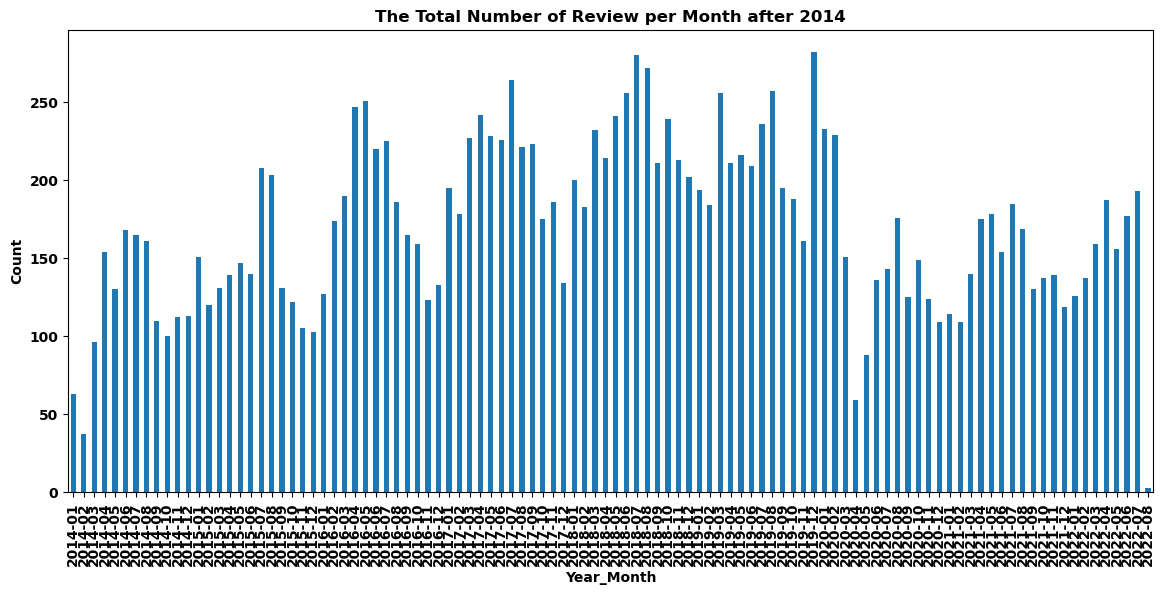

In [46]:
plt.figure(figsize=(14,6))

df_2014.groupby('Year_Month')["Year_Month"].count().plot(kind='bar')
plt.title("The Total Number of Review per Month after 2014")
plt.ylabel("Count")

The number of review decrease around December. This is probably because it is holiday season, such as Thanksgiving day, Black Friday, and Christmas. So people spend more money for buying present or some stuff instead of dining out. Then, it gets increasing around April, which is around Tax return season.

**Check what/how many words in the reviews.**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

In [17]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words='english')

# 2. Fit 
bagofwords.fit(df["Review Text"])

# 3. Transform
df_transformed = bagofwords.transform(df["Review Text"])
df_transformed.shape

(19896, 22202)

In [18]:
review_words = bagofwords.get_feature_names()
review_words

['00',
 '000',
 '000pm',
 '00am',
 '00pm',
 '01',
 '011b62f7ce21e9bea1c2ce1e4b2c096c8ca2580c59513d350affc5ab7d263f7e',
 '016bbb6dcfe3426758c2a3f6609f0d69bca95e4faaacc9bc00e5e868542daa13',
 '02',
 '02a0e1d68263c14c0dd58132bf7feba8549331742830e3958cfae58bc52501f8',
 '02a6ee7b32bb8c61cb255df77fc5847b48b0b0b6d42441d62bc600d9cde3d955',
 '02d21a893bba4050ca5d24c92696831c70742c4c4e2452dad7b5bf7b2321654a',
 '03',
 '04',
 '04867a5ecf4cfcc2e1cfd9615c9101d355bdcff15821d1526eb7dbfabd456d6f',
 '05',
 '05pm',
 '06',
 '07',
 '08',
 '09',
 '0ee981cd3f2ba6a27f4faa2c46bfc6763631c51b9d47b406632b24f69b7f3d63',
 '0r',
 '0stars',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100s',
 '100x',
 '101',
 '101s',
 '102',
 '1030',
 '1030am',
 '1030ish',
 '1030pm',
 '104',
 '1045',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10a',
 '10am',
 '10ish',
 '10lbs',
 '10min',
 '10mins',
 '10minutes',
 '10p',
 '10pm',
 '10th',
 '10x',
 '11',
 '110',
 '1101',
 '111',
 '112',
 '1130',
 '1140',
 '115',
 '1150am',
 '1155am',
 '

**Remove numbers and marks, and check what/how many words in the review.**

In [19]:
word_df = df.copy()
word_df["Review Text"] = word_df["Review Text"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")
word_df.head()

C:\Users\yumem\AppData\Local\Temp\ipykernel_10356\594792672.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  word_df["Review Text"] = word_df["Review Text"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")


,Yelp URL,Rating,Date,Review Text,Year_Month,Year
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...,2022-01,2022
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream My favor...,2022-06,2022
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day Staff was very ...,2021-08,2021
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew I got th...,2016-07,2016
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,2015-06,2015


In [20]:
# 1. Instantiate 
bagofwords = CountVectorizer(tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')

# 2. Fit 
bagofwords.fit(word_df["Review Text"])

# 3. Transform
df_transformed = bagofwords.transform(word_df["Review Text"])
df_transformed.shape

C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti'

(19896, 14818)

In [21]:
review_words2 = bagofwords.get_feature_names()
review_words2

['',
 'aa',
 'aaa',
 'aaaaa',
 'aaaaaaahhhhhh',
 'aaaaaamaz',
 'aaaaaand',
 'aaaaand',
 'aaaah',
 'aaaahhhh',
 'aaaand',
 'aaab',
 'aaah',
 'aaamaz',
 'aaamazinggggg',
 'aaand',
 'aad',
 'aaf',
 'aahahaha',
 'aahhhhhmaz',
 'aaliyah',
 'aaron',
 'ab',
 'aback',
 'abandon',
 'abari',
 'abbazaba',
 'abbi',
 'abc',
 'abey',
 'abid',
 'abil',
 'abita',
 'abject',
 'abjectli',
 'abl',
 'ablw',
 'aboard',
 'abod',
 'abol',
 'abomin',
 'abound',
 'abov',
 'abroad',
 'abrupt',
 'abruptli',
 'absenc',
 'absent',
 'absente',
 'absinth',
 'absolut',
 'absolutley',
 'absorb',
 'absoulti',
 'abstract',
 'absurd',
 'absurdli',
 'abt',
 'abuelita',
 'abund',
 'abundantli',
 'abus',
 'abuzz',
 'abysm',
 'ac',
 'acai',
 'accb',
 'accent',
 'accentu',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'acclaim',
 'accolad',
 'accomd',
 'accommod',
 'accomod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'accordion',
 'accost',
 'account',
 'accoutr',
 'accross',
 'accru',
 'accumul',

**Check which words in the stemmed word list**

In [22]:
"wait" in review_words2

True

In [23]:
"waiting" in review_words2

False

In [24]:
"delay" in review_words2

True

In [25]:
"slow" in review_words2

True

In [26]:
"service" in review_words2

False

In [27]:
"servic" in review_words2

True

In [28]:
"time" in review_words2

True

In [29]:
"quicker" in review_words2

True

In [31]:
bagofword_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=df_transformed.toarray())
display(bagofword_df)

,,aa,aaa,aaaaa,aaaaaaahhhhhh,aaaaaamaz,aaaaaand,aaaaand,aaaah,aaaahhhh,...,zombi,zone,zoo,zoom,zootopia,zoreo,zr,zuul,zykwn,zzqi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Look for each key words in the review

# Change or add key words in this list 
keywords = ["wait"]

test_keyword_index = []

for index in range(len(bagofword_df)):
    for keyword in keywords:
        if bagofword_df.loc[index][keyword] > 0:
            if index not in test_keyword_index:
                test_keyword_index.append(index)

In [ ]:
# Look for both key words in the review

# Change or add key words in this list 
keywords = ["long", "line"]

test_keyword_index = []

for index in range(len(bagofword_df)):
    if (bagofword_df.loc[index][keywords[0]] > 0) & (bagofword_df.loc[index][keywords[1]] > 0):
        test_keyword_index.append(index)

In [41]:
test_keyword_df = df.loc[test_keyword_index, :]
test_keyword_df

,Yelp URL,Rating,Date,Review Text,Year_Month,Year
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,2015-06,2015
27,https://www.yelp.com/biz/rewind-ice-cream-boba...,3,2022-07-18,After seeing some positive reviews about Rewin...,2022-07,2022
29,https://www.yelp.com/biz/rewind-ice-cream-boba...,2,2022-07-12,This was the longest wait I've had for an ice ...,2022-07,2022
36,https://www.yelp.com/biz/rewind-ice-cream-boba...,5,2020-11-01,I scrolled through Google to find the closest ...,2020-11,2020
41,https://www.yelp.com/biz/rewind-ice-cream-boba...,4,2020-08-23,"Craving some bubble tea? Be kind, visit Rewind...",2020-08,2020
...,...,...,...,...,...,...
19846,https://www.yelp.com/biz/churn-homemade-ice-cr...,4,2021-08-21,"We went on a Friday night, it was busy, but we...",2021-08,2021
19854,https://www.yelp.com/biz/ice-cream-social-madison,5,2022-03-06,I have been following Ice Cream Social since t...,2022-03,2022
19877,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2022-04-07,My friend strongly recommended La Pasticceria ...,2022-04,2022
19878,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2022-02-18,"We dropped by because of Lavazza, but we're in...",2022-02,2022


In [43]:
test_keyword_df[test_keyword_df["Rating"]==1]

,Yelp URL,Rating,Date,Review Text,Year_Month,Year
135,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2020-06-06,All of the positive things I have to say about...,2020-06,2020
136,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2021-08-06,This place took way to long to prep my order f...,2021-08,2021
175,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2020-06-14,"This girl named ""Stephanie"" took my order and ...",2020-06,2020
186,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2021-02-14,Worst place I ever visited. If you order via o...,2021-02,2021
207,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2018-11-09,"I probably would have given a 3 star, but my 2...",2018-11,2018
...,...,...,...,...,...,...
19502,https://www.yelp.com/biz/day-and-night-exotic-...,1,2022-03-27,Came to the Cereal Bar with friends and spouse...,2022-03,2022
19551,https://www.yelp.com/biz/hopscotch-champaign,1,2017-10-04,I submitted a wedding inquiry with Hopscotch a...,2017-10,2017
19779,https://www.yelp.com/biz/paris-super-crepes-ch...,1,2017-09-29,I have honestly never felt the need to review ...,2017-09,2017
19816,https://www.yelp.com/biz/oberweis-ice-cream-an...,1,2018-05-31,The place is clean and the staff were friendly...,2018-05,2018


In [42]:
test_keyword_df.loc[135, "Review Text"]

'All of the positive things I have to say about this place have to do with the branding and the service - the guy working was super nice and patient, waiting for us to make up our minds for what probably felt to him like forever. We were having so much trouble because the drink menu looked SO tempting. Eventually, we ordered: a cocoa puffs chocolate brownie ice cream monstrosity for him; a coconut milk/matcha drink for me, 20% sugar (yes, they allow you to choose your sugar percentage down to the percentage point. Awesome). So something really awful must have happened for me to give one star at this point, right? Yeah. The drink happened. The drink was just... terrible. Instead of using actual coconut milk, they used what tasted like an avalanche of artificial coconut flavor. Maybe there was actual coconut milk under there, but I honestly couldn\'t tell. It tasted like a Mounds bar. The matcha, layered on top, was visible, you know, visually, but taste-wise it may as well have been gre

The word "wait" is more like negative word in reviews, but some reviewers use the word as positive meaning even their rating is low like above. From that reason, I consider the words which sound like positive meaning, such as "fast", "quick", could be negative meaning too (i.e. "The line was so long. I wish it moved quicker.") Therefore, we should include these words in our keywords.

## Create a dataframe with data which has key words in the review

In [99]:
# Change or add key words in this list 
keywords = ["wait", "delay"]

keyword_index = []

for index in range(len(bagofword_df)):
    for keyword in keywords:
        if bagofword_df.loc[index][keyword] > 0:
            if index not in keyword_index:
                keyword_index.append(index)
            

In [100]:
len(keyword_index)

2372

In [101]:
# Dataframe with key word data
keyword_df = df.loc[keyword_index, :]
keyword_df

,Yelp URL,Rating,Date,Review Text
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...
27,https://www.yelp.com/biz/rewind-ice-cream-boba...,3,2022-07-18,After seeing some positive reviews about Rewin...
29,https://www.yelp.com/biz/rewind-ice-cream-boba...,2,2022-07-12,This was the longest wait I've had for an ice ...
36,https://www.yelp.com/biz/rewind-ice-cream-boba...,5,2020-11-01,I scrolled through Google to find the closest ...
41,https://www.yelp.com/biz/rewind-ice-cream-boba...,4,2020-08-23,"Craving some bubble tea? Be kind, visit Rewind..."
...,...,...,...,...
19846,https://www.yelp.com/biz/churn-homemade-ice-cr...,4,2021-08-21,"We went on a Friday night, it was busy, but we..."
19854,https://www.yelp.com/biz/ice-cream-social-madison,5,2022-03-06,I have been following Ice Cream Social since t...
19877,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2022-04-07,My friend strongly recommended La Pasticceria ...
19878,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2022-02-18,"We dropped by because of Lavazza, but we're in..."


<AxesSubplot: xlabel='Rating'>

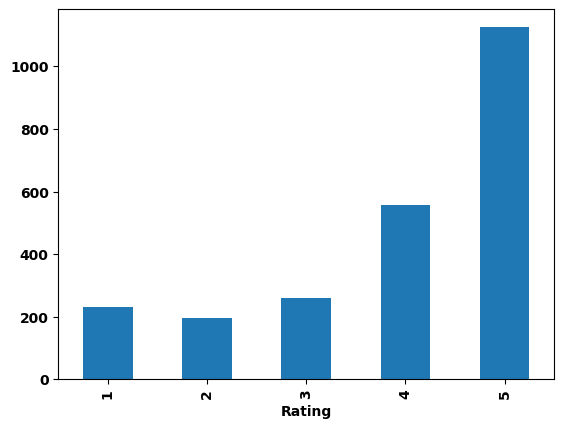

In [135]:
# Bar chart of the data with key words
keyword_df.groupby("Rating")["Rating"].count().plot(kind="bar")

In [136]:
# Data with key word and rating of 5
keyword_df[keyword_df["Rating"]==5]

,Yelp URL,Rating,Date,Review Text
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...
36,https://www.yelp.com/biz/rewind-ice-cream-boba...,5,2020-11-01,I scrolled through Google to find the closest ...
58,https://www.yelp.com/biz/rewind-ice-cream-boba...,5,2019-01-17,YES YES YES! This place was so good. I had hea...
63,https://www.yelp.com/biz/rewind-ice-cream-boba...,5,2020-05-06,Rewind has super delicious drinks. I tried the...
64,https://www.yelp.com/biz/rewind-ice-cream-boba...,5,2021-02-14,It's Valentines Day and me without a Valentine...
...,...,...,...,...
19733,https://www.yelp.com/biz/matcha-cafe-maiko-cha...,5,2020-03-14,Waiting for this place come to Charlotte for a...
19734,https://www.yelp.com/biz/matcha-cafe-maiko-cha...,5,2020-01-06,I have always been a Matcha lover but my wife ...
19844,https://www.yelp.com/biz/churn-homemade-ice-cr...,5,2021-12-26,I wish I had pictures to share! The best artic...
19854,https://www.yelp.com/biz/ice-cream-social-madison,5,2022-03-06,I have been following Ice Cream Social since t...


In [138]:
keyword_df.loc[4, "Review Text"]

'This is one of my favorite places to get ice cream in the CU area. It\'s a bit of drive, but it is worth it. It\'s about 10 minutes from the far side of Urbana. Getting there is really easy. The atmosphere of the Dairy Barn is very kid friendly. There are many tables set up so that you can sit and enjoy the ice cream. When my friends and I went, the line was about a 20 minute wait, but it didn\'t seem like any time at all. An older gentlemen, I presume the manager or owner, was giving out samples to the entire line. You could tell that he took pride in the product he made and was excited to share it with everyone. The special that night was cappuccino ice cream. I added in cookie dough to make a "tornado" which is a blizzard like ice cream treat. It was so quite refreshing and was a nice treat on a humid night. The Dairy barn is a must go!'

In [139]:
# Data with key word and rating of 1
keyword_df[keyword_df["Rating"]==1]

,Yelp URL,Rating,Date,Review Text
135,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2020-06-06,All of the positive things I have to say about...
136,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2021-08-06,This place took way to long to prep my order f...
175,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2020-06-14,"This girl named ""Stephanie"" took my order and ..."
186,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2021-02-14,Worst place I ever visited. If you order via o...
207,https://www.yelp.com/biz/rewind-ice-cream-boba...,1,2018-11-09,"I probably would have given a 3 star, but my 2..."
...,...,...,...,...
19502,https://www.yelp.com/biz/day-and-night-exotic-...,1,2022-03-27,Came to the Cereal Bar with friends and spouse...
19551,https://www.yelp.com/biz/hopscotch-champaign,1,2017-10-04,I submitted a wedding inquiry with Hopscotch a...
19779,https://www.yelp.com/biz/paris-super-crepes-ch...,1,2017-09-29,I have honestly never felt the need to review ...
19816,https://www.yelp.com/biz/oberweis-ice-cream-an...,1,2018-05-31,The place is clean and the staff were friendly...


In [140]:
keyword_df.loc[135, "Review Text"]

'All of the positive things I have to say about this place have to do with the branding and the service - the guy working was super nice and patient, waiting for us to make up our minds for what probably felt to him like forever. We were having so much trouble because the drink menu looked SO tempting. Eventually, we ordered: a cocoa puffs chocolate brownie ice cream monstrosity for him; a coconut milk/matcha drink for me, 20% sugar (yes, they allow you to choose your sugar percentage down to the percentage point. Awesome). So something really awful must have happened for me to give one star at this point, right? Yeah. The drink happened. The drink was just... terrible. Instead of using actual coconut milk, they used what tasted like an avalanche of artificial coconut flavor. Maybe there was actual coconut milk under there, but I honestly couldn\'t tell. It tasted like a Mounds bar. The matcha, layered on top, was visible, you know, visually, but taste-wise it may as well have been gre

**Create dataframe with no key words**

In [102]:
# Dataframe with no key word data
no_keyword_index = []

for index in range(len(bagofword_df)):
    if index not in keyword_index:
        no_keyword_index.append(index)
        
no_keyword_df = df.loc[no_keyword_index, :]
no_keyword_df

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2022-01-22,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2022-06-26,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2021-08-07,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...
5,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2019-05-01,I've been coming to this ice cream stand since...
...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2021-07-17,Had the chocolate cannoli! The filling was ric...
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-21,Love apricot croissant! I bought it at 4:00 PM...
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-12,Line was about 25 people long. It went fast! T...
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,2021-04-11,Its hard not to order everything when I come h...


**Similar Word**; Check similar words of "wait", "delay"...

Checking which words we should focus on.

In [48]:
import gensim

In [49]:
model = gensim.models.KeyedVectors.load_word2vec_format(
    'D:/BrainStation2/2023_11_20 Representation Learning/lexvec-wikipedia-word-vectors', binary=False
)

In [51]:
similar = model.most_similar(positive=['checkout'], topn=50)

pd.DataFrame(similar, columns=["wait", "Similarity"])

,wait,Similarity
0,checkouts,0.653770
1,grocery,0.536660
2,supermarket,0.534764
3,cashier,0.532229
4,tills,0.522761
5,cashiers,0.517698
6,vending,0.516873
7,kiosks,0.504531
8,groceries,0.503165
9,kiosk,0.500552


In [33]:
similar = model.most_similar(positive=['delay'], topn=20)

pd.DataFrame(similar, columns=["delay", "Similarity"])

,delay,Similarity
0,delaying,0.744106
1,delayed,0.715962
2,postpone,0.694643
3,delays,0.694191
4,postponement,0.692297
5,postponing,0.647009
6,cancel,0.536164
7,expedite,0.535384
8,postponed,0.512770
9,defer,0.512486


In [34]:
similar = model.most_similar(positive=['slow'], topn=20)

pd.DataFrame(similar, columns=["slow", "Similarity"])

,slow,Similarity
0,slower,0.675572
1,slows,0.619970
2,fast,0.612379
3,slowed,0.611729
4,slowing,0.610035
5,sluggish,0.590012
6,accelerating,0.564410
7,accelerate,0.557568
8,steady,0.538749
9,gradual,0.537739


In [36]:
similar = model.most_similar(positive=['waiting', 'time'], topn=20)

pd.DataFrame(similar, columns=["waiting time", "Similarity"])

,waiting time,Similarity
0,wait,0.680097
1,waited,0.654616
2,hours,0.566302
3,days,0.553234
4,going,0.530875
5,awhile,0.528198
6,waits,0.525250
7,wondering,0.504116
8,watching,0.501373
9,coming,0.500907


In [45]:
similar = model.most_similar(positive=['restaurant'], topn=20)

pd.DataFrame(similar, columns=["restaurant", "Similarity"])

,waiting time,Similarity
0,eatery,0.827317
1,restaurants,0.762142
2,bistro,0.708876
3,diner,0.705085
4,cafe,0.704506
5,eateries,0.686077
6,hotel,0.659254
7,dining,0.650583
8,grill,0.633884
9,bakery,0.629628


In [48]:
similar = model.most_similar(positive=['restaurant', 'wait'], topn=50)

pd.DataFrame(similar, columns=["bad restaurant", "Similarity"])

,bad restaurant,Similarity
0,waited,0.607016
1,eatery,0.601629
2,waiting,0.593016
3,diner,0.569325
4,restaurants,0.536882
5,bistro,0.534620
6,cafe,0.519154
7,meal,0.518407
8,sit,0.512824
9,grill,0.507754


In [50]:
model